In [9]:
#Импорты
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
!pip install umap-learn
import umap
import time

print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


# Практическая работа №2

#### Задание №1

Найти и выгрузить многомерные данные (с большим количеством признаков – столбцов) с использованием библиотеки pandas. В отчёте описать найденные данные.

In [10]:
df = sns.load_dataset('planets')
print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


#### Задание №2

Вывести информацию о данных при помощи методов .info(), .head(). Проверить данные на наличие пустых значений. В случае их наличия удалить данные строки или интерполировать пропущенные значения. При необходимости дополнительно предобработать данные для дальнейшей работы с ними.

In [11]:
print("Балакин Даниил ИНБО-02-21")
print(df.info())
print(df.head())
print(df.isnull().sum())

Балакин Даниил ИНБО-02-21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
method              0
number              0


#### Задание №3

Построить столбчатую диаграмму (.bar) с использованием модуля graph_ из библиотеки Plotly со следующими параметрами:

3.1. По оси Х указать дату или название, по оси У указать количественный показатель.

3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (marker=dict(color=признак, coloraxis="coloraxis")).

3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2.

3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста.

3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315.

3.6. Размер текста меток осей сделать равным 14.

3.7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей.

3.8. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2. (Можно сделать это при настройке осей с помощью gridwidth=2, gridcolor='ivory')

3.9. Убрать лишние отступы по краям.

In [12]:
print("Балакин Даниил ИНБО-02-21")
data = df['year'].value_counts().reset_index()
data.columns = ['year', 'Count']
# Создание диаграммы
fig = go.Figure(data=[go.Bar(
    x=data['year'],
    y=data['Count'],
    marker=dict(
        color=data['Count'],
        coloraxis='coloraxis',
        line=dict(color='black', width=2)
    )
)])
# Настройка дизайнна графика
fig.update_layout(
    title='Количество планет обнаруженных по годам',
    title_font_size=20,
    xaxis_title='Год',
    yaxis_title='Количество',
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    xaxis_tickangle=-45,
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    height=700,
    width=800,
    margin=dict(l=0, r=0, t=40, b=0),
    xaxis=dict(
        gridcolor='ivory',
        gridwidth=2
    ),
    yaxis=dict(
        gridcolor='ivory',
        gridwidth=2
    ),
)
fig.update_layout(margin=dict(l=0, r=0, t=50, b=0))
fig.show()

Балакин Даниил ИНБО-02-21


#### Задание №4

Построить круговую диаграмму (go.Pie), использовав данные и стиль оформления из предыдущего графика. Сделать так, чтобы границы каждой доли были выделены чёрной линией с толщиной, равной 2 и категории круговой диаграммы были читаемы


Балакин Даниил ИНБО-02-21


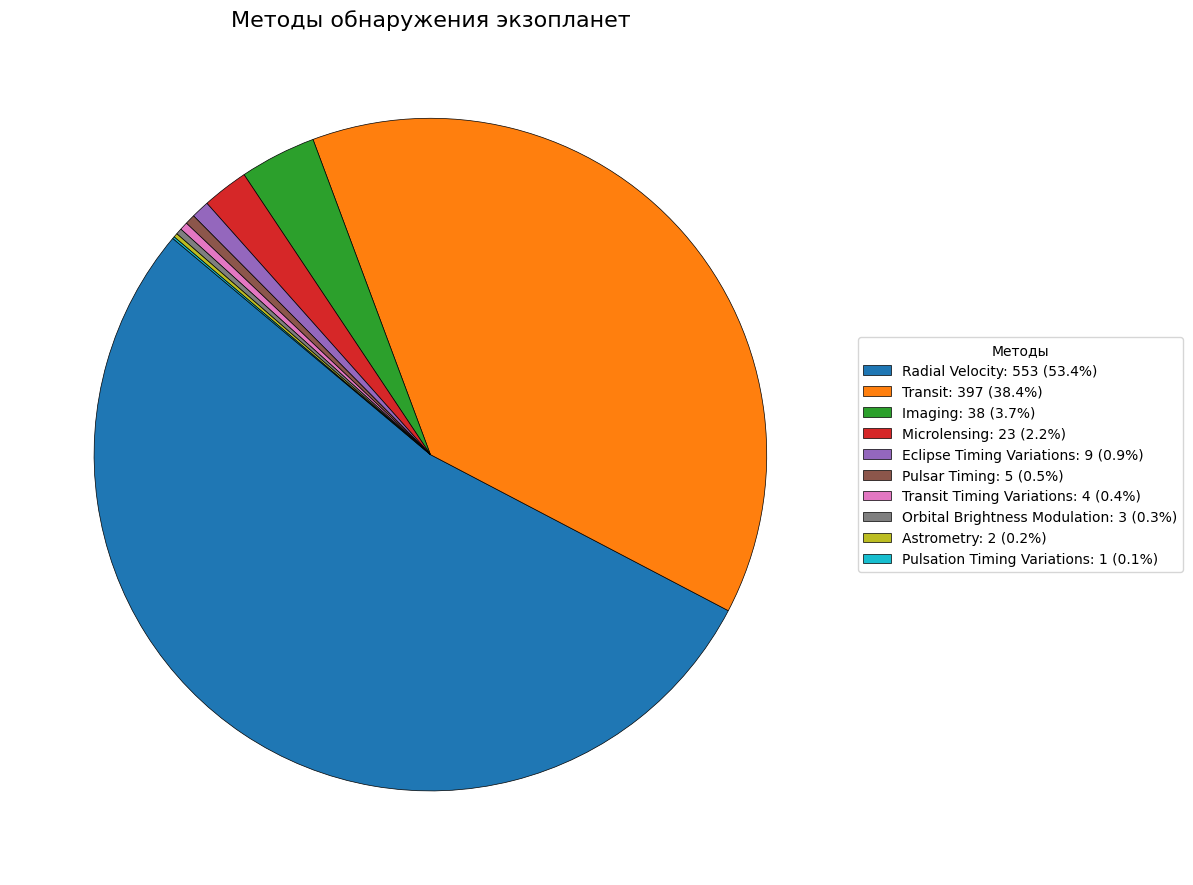

In [13]:
print("Балакин Даниил ИНБО-02-21")
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = sns.load_dataset('planets')

# Подсчет количества каждого метода
method_counts = df['method'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(12, 12))
wedges, texts = plt.pie(method_counts, startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, colors=sns.color_palette('tab10'))

# Создание списка для легенды с процентами
legend_labels = [f'{label}: {count} ({100 * count / sum(method_counts):.1f}%)'
for label, count in zip(method_counts.index, method_counts)]

# Добавление легенды
plt.legend(wedges, legend_labels, title="Методы", loc="center left", bbox_to_anchor=(1, 0.5))

# Добавление заголовка
plt.title('Методы обнаружения экзопланет', fontsize=16)

# Отображение графика
plt.tight_layout()
plt.show()

#### Задание №5

Построить линейные графики, взять один из параметров и определить зависимость между другими несколькими (от 2 до 5) показателями с использованием библиотеки matplotlib. Сделать вывод.

Балакин Даниил ИНБО-02-21


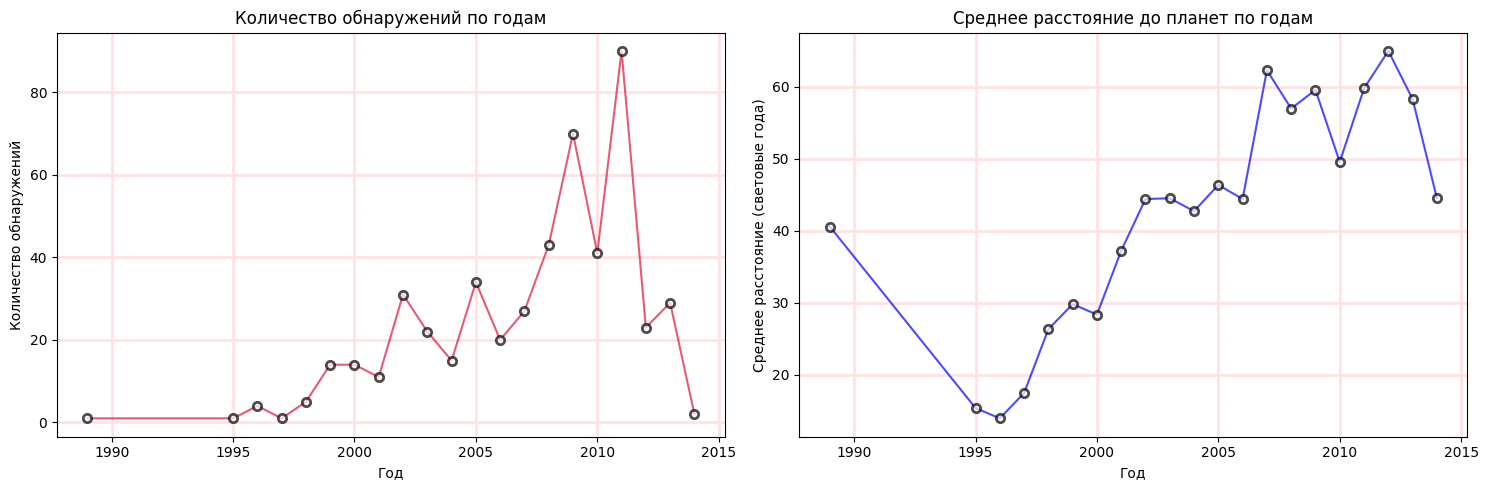

In [14]:
print("Балакин Даниил ИНБО-02-21")
ds = sns.load_dataset('planets')
pc = ds.dropna()

pcd = pc['year'].value_counts().reset_index()
pcd.columns = ['year', 'count']
pcd = pcd.sort_values('year')

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Линейный график количества обнаружений по годам
axs[0].plot(pcd['year'], pcd['count'], 'o-', color='crimson', alpha=0.7,
            markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
axs[0].set_title('Количество обнаружений по годам')
axs[0].set_xlabel('Год')
axs[0].set_ylabel('Количество обнаружений')
axs[0].grid(linewidth=2, color='mistyrose')

pc_distance = pc.groupby('year')['distance'].mean().reset_index()

# Линейный график зависимости среднего расстояния до планеты от года
axs[1].plot(pc_distance['year'], pc_distance['distance'], 'o-', color='blue', alpha=0.7,
            markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
axs[1].set_title('Среднее расстояние до планет по годам')
axs[1].set_xlabel('Год')
axs[1].set_ylabel('Среднее расстояние (световые года)')
axs[1].grid(linewidth=2, color='mistyrose')

plt.tight_layout()
plt.show()

Вывод

Первый график показывает рост количества обнаруженных планет с годами, что можно связать с развитием технологий.

Второй график демонстрирует, как изменялось среднее расстояние до обнаруженных экзопланет с течением времени. Это может указывать на то, что в последние годы удается находить более удалённые планеты.

#### Задание №6

Выполнить визуализацию многомерных данных, используя t-SNE. Необходимо использовать набор данных MNIST или fashion MNIST (можно использовать и другие готовые наборы данных, где можно наблюдать разделение объектов по кластерам).
Рассмотреть результаты визуализации для разных значений перплексии.

Балакин Даниил ИНБО-02-21


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.002s...
[t-SNE] Computed neighbors for 500 samples in 0.061s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 482.972987
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.027641
[t-SNE] KL divergence after 300 iterations: 1.139349


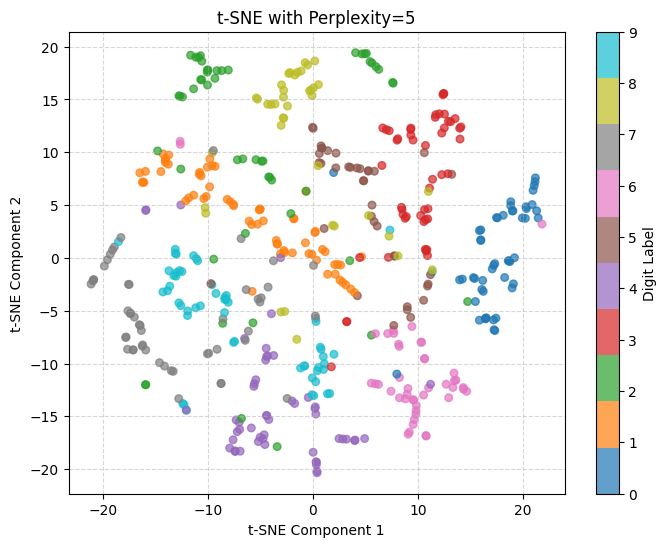

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.007s...
[t-SNE] Computed neighbors for 500 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 762.872864
[t-SNE] KL divergence after 150 iterations with early exaggeration: 61.429729
[t-SNE] KL divergence after 300 iterations: 0.703924


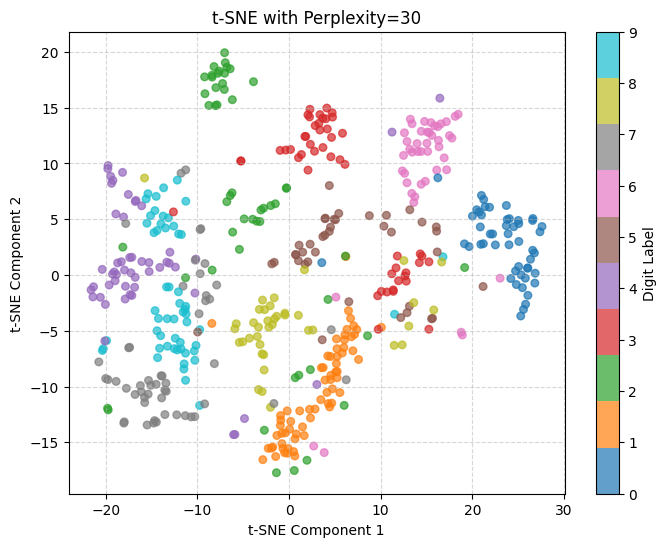

In [15]:
print("Балакин Даниил ИНБО-02-21")
# Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1, parser='auto')
data = mnist.data
labels = mnist.target.astype(int)

# Подборка подмножества данных для ускорения обработки
subset_size = 500  # кгда была 1000 2 мин ждал, ужас...
data_subset = data[:subset_size]
labels_subset = labels[:subset_size]

# Функция для выполнения t-SNE и визуализации
def tsne_visualization(perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=300, verbose=1)
    reduced_data = tsne.fit_transform(data_subset)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_subset, cmap='tab10', s=30, alpha=0.7)
    plt.colorbar(scatter, label='Digit Label')
    plt.title(f't-SNE with Perplexity={perplexity}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# выобор значений перплексии
for perplexity in [5, 30]:
    tsne_visualization(perplexity)

#### Задание №7

Выполнить визуализацию многомерных данных, используя с различными параметрами n_ и min_dist. Рассчитать время работы алгоритма с помощью библиотеки и сравнить его с временем работы t-SNE.

Балакин Даниил ИНБО-02-21


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 455.236120
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.563057
[t-SNE] KL divergence after 300 iterations: 1.757664


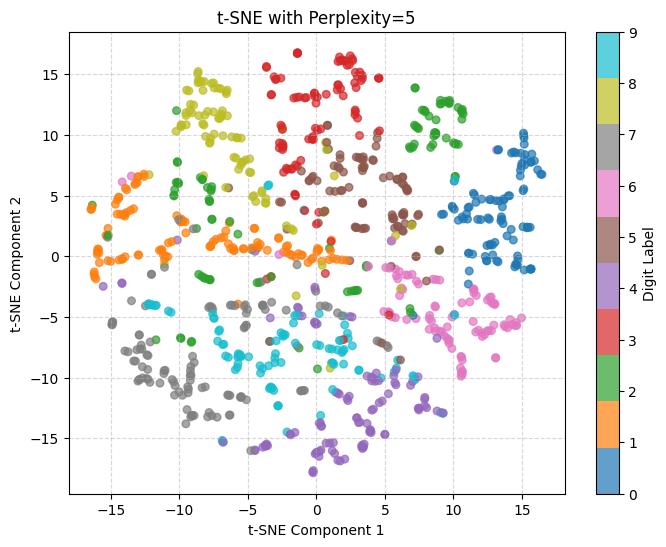

t-SNE with Perplexity=5 took 3.97 seconds
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.008s...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computed neighbors for 1000 samples in 0.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 702.941820
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.077934
[t-SNE] KL divergence after 300 iterations: 1.242150


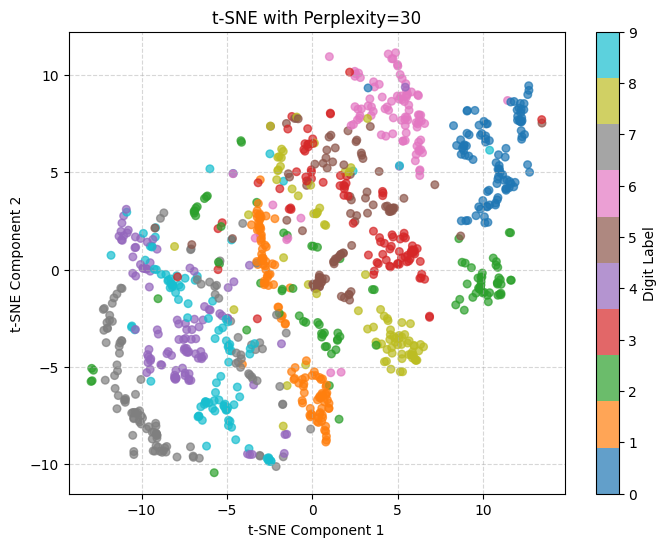

t-SNE with Perplexity=30 took 3.50 seconds


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



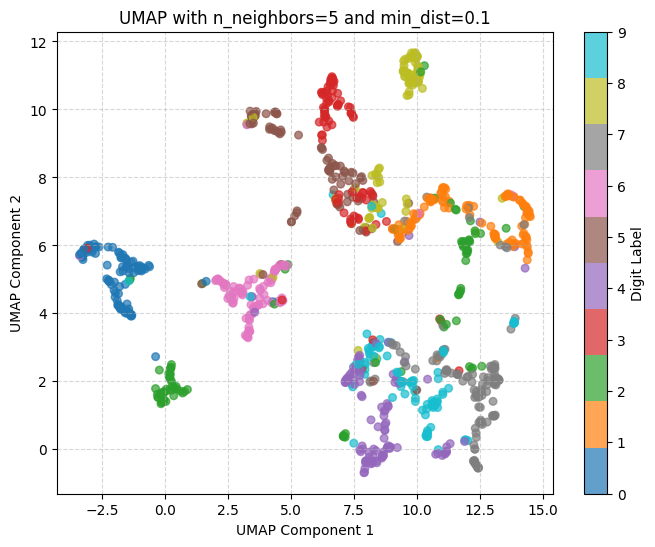

UMAP with n_neighbors=5 and min_dist=0.1 took 2.81 seconds


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



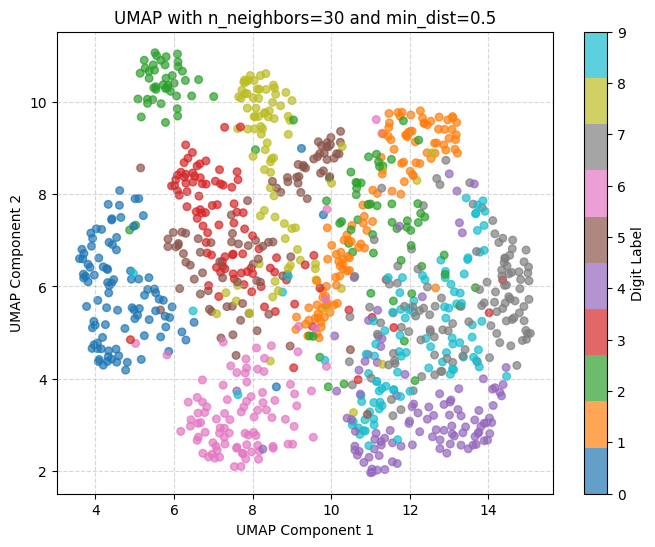

UMAP with n_neighbors=30 and min_dist=0.5 took 3.53 seconds


In [16]:
print("Балакин Даниил ИНБО-02-21")
# Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1, parser='auto')
data = mnist.data
labels = mnist.target.astype(int)

# Подборка подмножества данных для ускорения обработки
subset_size = 1000
data_subset = data[:subset_size]
labels_subset = labels[:subset_size]

# Функция для выполнения t-SNE и визуализации
def tsne_visualization(perplexity):
    start_time = time.time()
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=300, verbose=1)
    reduced_data = tsne.fit_transform(data_subset)
    end_time = time.time()

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_subset, cmap='tab10', s=30, alpha=0.7)
    plt.colorbar(scatter, label='Digit Label')
    plt.title(f't-SNE with Perplexity={perplexity}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    print(f't-SNE with Perplexity={perplexity} took {end_time - start_time:.2f} seconds')

# Функция для выполнения UMAP и визуализации
def umap_visualization(n_neighbors, min_dist):
    start_time = time.time()
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
    reduced_data = reducer.fit_transform(data_subset)
    end_time = time.time()

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_subset, cmap='tab10', s=30, alpha=0.7)
    plt.colorbar(scatter, label='Digit Label')
    plt.title(f'UMAP with n_neighbors={n_neighbors} and min_dist={min_dist}')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    print(f'UMAP with n_neighbors={n_neighbors} and min_dist={min_dist} took {end_time - start_time:.2f} seconds')

# Визуализация для различных значений перплексии для t-SNE
for perplexity in [5, 30]:
    tsne_visualization(perplexity)

# Визуализация для различных значений параметров для UMAP
for n_neighbors, min_dist in [(5, 0.1), (30, 0.5)]:
    umap_visualization(n_neighbors, min_dist)